In [3]:
###importation packages
import numpy as np                   
import matplotlib.pyplot as plt     
import random                       

import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix



In [4]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", Y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


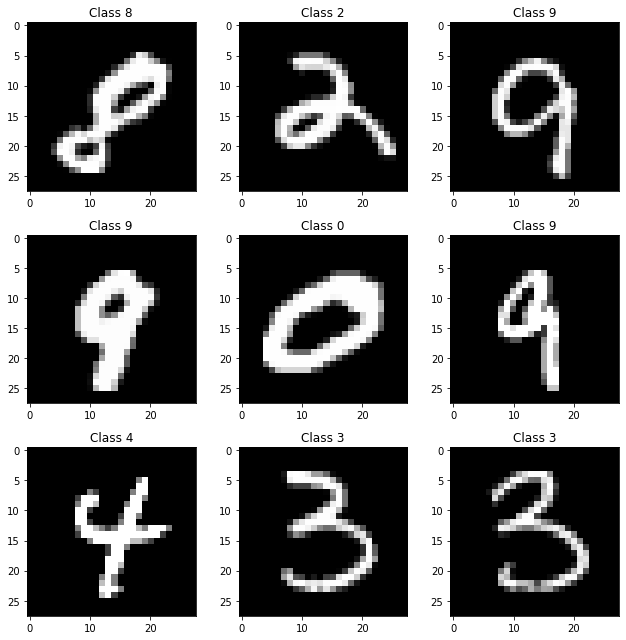

In [5]:
plt.rcParams['figure.figsize'] = (9,9) # pour que les images s'affichent en plus grand dans le notebook

random.seed(3)
nums = [random.randint(0, len(X_train)) for x in range(9)]

for i, num in enumerate(nums):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))
    
plt.tight_layout()

In [6]:
# une petite fonction pour afficher les matrices joliment
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[nums[2]])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0   49  138  191  244  138   55   15    0    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    5   68  228  252  252  253  252  252  219   15    0    0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0  138  252  252  153   69   69   90  202  252   54    0    0  0  0 

In [7]:
###Reformater
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train, X_test = X_train / 255.0, X_test / 255.0

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
###variation de la taille de la couche dense
# PARAMETRES 

params = {'dense_size': 68, 
          'dense_layers':4}



In [9]:
model = tf.keras.models.Sequential()

In [10]:
###ajouter des couches
model.add(
    tf.keras.layers.Dense(params['dense_size'], input_shape=(784,))
    ) # une couche dense (fully connected) de taille 64

In [11]:
###variation de la fonction d'activation ReLU
model.add(
    tf.keras.layers.Activation('relu')
    )
###dense_layers et dense_size modifier plus haut 
model.summary()

for l in range(params['dense_layers']): 
  model.add(
    tf.keras.layers.Dense(params['dense_size'])
    )
  model.add(
      tf.keras.layers.Activation('relu')
      )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
Total params: 53,380
Trainable params: 53,380
Non-trainable params: 0
_________________________________________________________________


In [12]:
###variation du dropout (doit etre compris entre 0 et 1)
model.add(
    tf.keras.layers.Dropout(0.4)
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
 dense_1 (Dense)             (None, 68)                4692      
                                                                 
 activation_1 (Activation)   (None, 68)                0         
                                                                 
 dense_2 (Dense)             (None, 68)                4692      
                                                                 
 activation_2 (Activation)   (None, 68)                0         
                                                                 
 dense_3 (Dense)             (None, 68)                4

In [13]:
###ajouter le classifieur
model.add(
    tf.keras.layers.Dense(10))
model.add(
    tf.keras.layers.Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                53380     
                                                                 
 activation (Activation)     (None, 68)                0         
                                                                 
 dense_1 (Dense)             (None, 68)                4692      
                                                                 
 activation_1 (Activation)   (None, 68)                0         
                                                                 
 dense_2 (Dense)             (None, 68)                4692      
                                                                 
 activation_2 (Activation)   (None, 68)                0         
                                                                 
 dense_3 (Dense)             (None, 68)                4

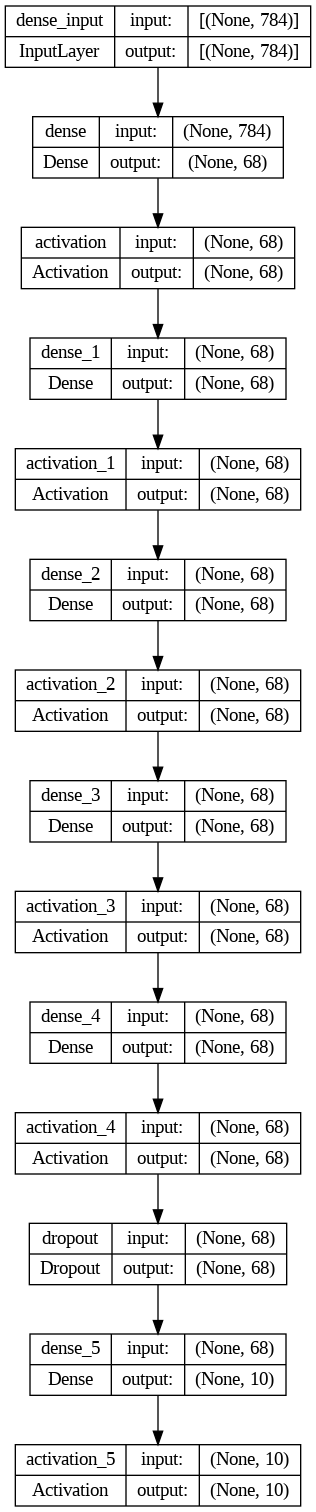

In [15]:
tf.keras.utils.plot_model(model, 'model1.png', show_shapes=True)

In [16]:
###modifier la fonction d'optimisation, compiler le modele
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adamax', 
              metrics=['accuracy'])

In [17]:
###entrainer le model, modifier la taille ds batchs
model.fit(X_train,        # input
          Y_train,        # output
          batch_size=64, # taille des minibatches
          epochs=5,       # nombre d'epochs (passages sur les données )
          verbose=1)      # option paramètrant la quantité d'informations à afficher pendant l'entrainement

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.6201 - accuracy: 0.8076
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.2581 - accuracy: 0.9280
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1961 - accuracy: 0.9465
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.1621 - accuracy: 0.9553
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1395 - accuracy: 0.9632


In [18]:
###evaluer le modele sur les données test
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9666
Test score: 0.11279598623514175
Test accuracy: 0.9666000008583069


In [19]:
###inspecter les resultats
from sklearn.metrics import classification_report, confusion_matrix

predicted_classes = model.predict(X_test)
predicted_classes

313/313 [==============================] - 1s 2ms/step


array([[5.25648329e-06, 1.13566515e-04, 3.22001579e-04, ...,
        9.99414086e-01, 4.25337294e-06, 1.40299398e-05],
       [3.83790393e-06, 1.09207664e-04, 9.99609768e-01, ...,
        6.25708299e-06, 1.39920630e-05, 2.26731402e-07],
       [1.07826287e-04, 9.97902870e-01, 4.05823579e-04, ...,
        6.69103698e-04, 1.64827725e-04, 1.62222015e-04],
       ...,
       [4.25525059e-06, 4.68366721e-07, 2.47134158e-05, ...,
        3.27265952e-05, 3.23445943e-06, 2.59038468e-04],
       [1.65654626e-07, 6.29366866e-07, 8.19024535e-06, ...,
        1.01484847e-08, 4.05209023e-04, 1.55073303e-06],
       [3.48214803e-06, 1.42490435e-07, 8.27582141e-07, ...,
        2.90768343e-09, 3.00129415e-07, 9.52530721e-10]], dtype=float32)

In [20]:
predicted_classes = model.predict(X_test).argmax(axis=1)

print(confusion_matrix(Y_test, predicted_classes))
print(classification_report(Y_test, predicted_classes))

313/313 [==============================] - 1s 2ms/step
[[ 968    0    1    2    0    4    2    1    2    0]
 [   0 1116    4    2    1    1    4    2    5    0]
 [   6    0  997    7    3    2    6    4    6    1]
 [   0    0    6  978    0   16    0    5    5    0]
 [   1    0    4    0  949    0    5    3    2   18]
 [   3    1    1    8    2  868    3    0    4    2]
 [   7    3    4    0    6    9  928    0    1    0]
 [   2    7   12    6    0    0    1  993    1    6]
 [   5    0    5   11    3    9    6    6  928    1]
 [   5    6    1   10   15   11    0   13    7  941]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.94      0.97      0.96       892
           6       0.97      0.97  

In [21]:
np.nonzero(predicted_classes != Y_test)[0]

array([ 104,  149,  151,  195,  233,  241,  247,  259,  320,  321,  340,
        403,  445,  448,  495,  582,  591,  610,  659,  684,  691,  707,
        717,  720,  740,  760,  810,  844,  881,  882,  890,  938,  939,
        951,  956,  965,  992, 1014, 1032, 1044, 1107, 1112, 1156, 1178,
       1181, 1194, 1226, 1232, 1242, 1247, 1260, 1283, 1319, 1328, 1337,
       1364, 1413, 1429, 1440, 1494, 1500, 1522, 1527, 1530, 1549, 1553,
       1559, 1587, 1609, 1634, 1678, 1681, 1709, 1717, 1754, 1790, 1800,
       1813, 1828, 1850, 1868, 1878, 1880, 1901, 1941, 1952, 1970, 1984,
       2016, 2024, 2035, 2040, 2043, 2044, 2053, 2098, 2109, 2118, 2129,
       2130, 2131, 2135, 2182, 2185, 2186, 2189, 2266, 2272, 2291, 2293,
       2325, 2369, 2371, 2380, 2387, 2395, 2406, 2414, 2488, 2514, 2607,
       2648, 2654, 2721, 2758, 2771, 2877, 2896, 2927, 2939, 2953, 2970,
       2979, 2995, 3005, 3030, 3060, 3073, 3110, 3117, 3189, 3206, 3240,
       3284, 3330, 3422, 3460, 3490, 3503, 3520, 35

In [22]:
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

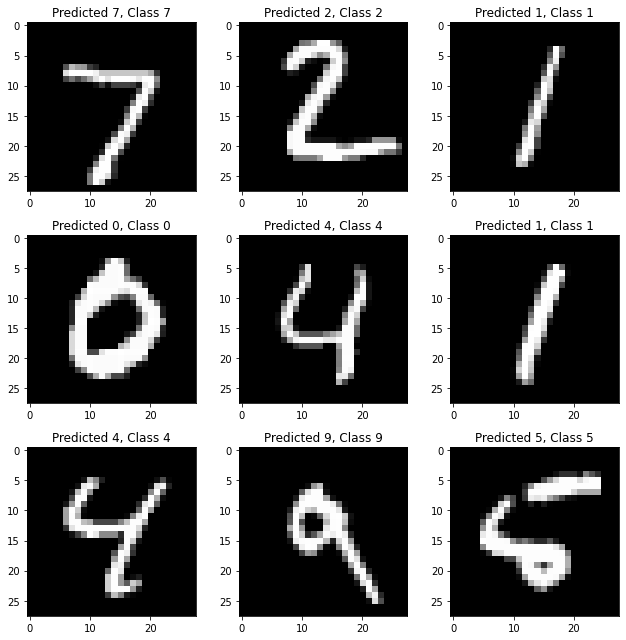

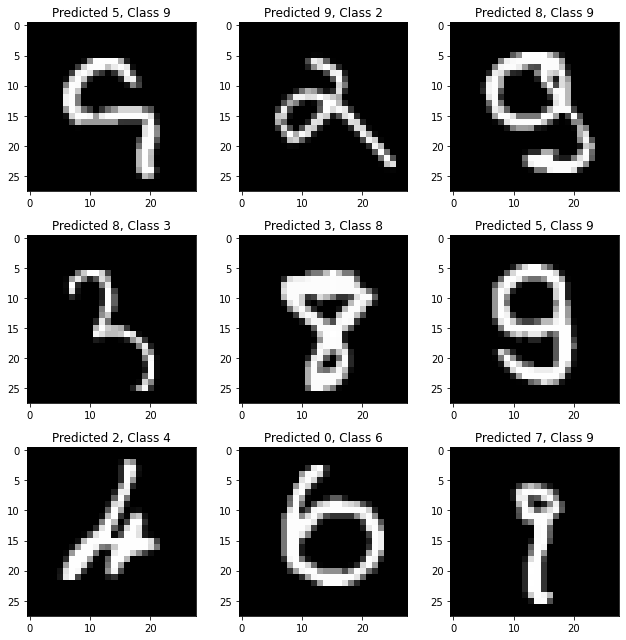

In [23]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    
plt.tight_layout()


plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    
plt.tight_layout()

In [24]:
###Convolution, variation des filtres et du kernel

tf.keras.layers.Conv2D(16,                      # on crée 16 filtres
                       (5, 5),                  # kernel de taille (5,5)
                       input_shape=(28,28,1))

In [25]:
###variation du pooling 
tf.keras.layers.MaxPooling2D(pool_size=(3,3))


In [26]:
# Recharger le dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [27]:
###Reformater
X_train = X_train.reshape(60000, 28, 28, 1) # Ajouter une dimension supplémentaire pour représenter la couche unique
X_test = X_test.reshape(10000, 28, 28, 1)

X_train, X_test = X_train / 255.0, X_test / 255.0

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [33]:
model = tf.keras.models.Sequential()                                 

# Convolution Layer 1
model.add(
    tf.keras.layers.Conv2D(16, (5, 5), input_shape=(28,28,1)))            
model.add(
    tf.keras.layers.Activation('relu') )                   

# Convolution Layer 2
model.add(
    tf.keras.layers.Conv2D(16, (5, 5)))                                    
model.add(
    tf.keras.layers.Activation('relu'))                         
model.add(
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)))         

model.add(
    tf.keras.layers.Flatten())                                

# Fully Connected Layer 5
model.add(
    tf.keras.layers.Dense(32))                                               
model.add(
    tf.keras.layers.Activation('relu'))                      

# Fully Connected Layer 6                       
model.add(
    tf.keras.layers.Dropout(0.4))                            
model.add(
    tf.keras.layers.Dense(16))                                
model.add(
    tf.keras.layers.Activation('softmax'))     

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
model.fit(X_train, Y_train,  epochs=5, verbose=1)
predicted_classes = model.predict(X_test).argmax(axis=1)

print(confusion_matrix(Y_test, predicted_classes))
print(classification_report(Y_test, predicted_classes))

Epoch 1/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.7212 - accuracy: 0.7696
Epoch 2/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.3347 - accuracy: 0.8947
Epoch 3/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.2565 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 95s 50ms/step - loss: 0.2156 - accuracy: 0.9338
Epoch 5/5
313/313 [==============================] - 7s 21ms/step
[[ 971    0    0    0    0    1    3    2    3    0]
 [   0 1120    5    3    0    1    1    2    3    0]
 [   1    0 1015    0    1    0    2    5    8    0]
 [   0    0    2  993    0    5    0    5    4    1]
 [   1    0    1    0  959    0    5    1    2   13]
 [   2    0    2   13    0  872    2    1    0    0]
 [   5    2    0    1    1   10  937    0    2    0]
 [   1    0   16    6    0    0    0  998    2    5]
 [   4    0    6    1    3    4    1    4  946    5]
 [   2    3    0    3    4   10    0    5    

Epoch 1/5
4020/4020 [==============================] - 91s 23ms/step - loss: 0.1720 - accuracy: 0.9480 - val_loss: 0.0693 - val_accuracy: 0.9794
Epoch 2/5
4020/4020 [==============================] - 90s 22ms/step - loss: 0.1606 - accuracy: 0.9516 - val_loss: 0.0663 - val_accuracy: 0.9807
Epoch 3/5
4020/4020 [==============================] - 88s 22ms/step - loss: 0.1504 - accuracy: 0.9546 - val_loss: 0.0642 - val_accuracy: 0.9811
Epoch 4/5
4020/4020 [==============================] - 88s 22ms/step - loss: 0.1394 - accuracy: 0.9579 - val_loss: 0.0628 - val_accuracy: 0.9821
Epoch 5/5
4020/4020 [==============================] - 90s 22ms/step - loss: 0.1308 - accuracy: 0.9605 - val_loss: 0.0615 - val_accuracy: 0.9831
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


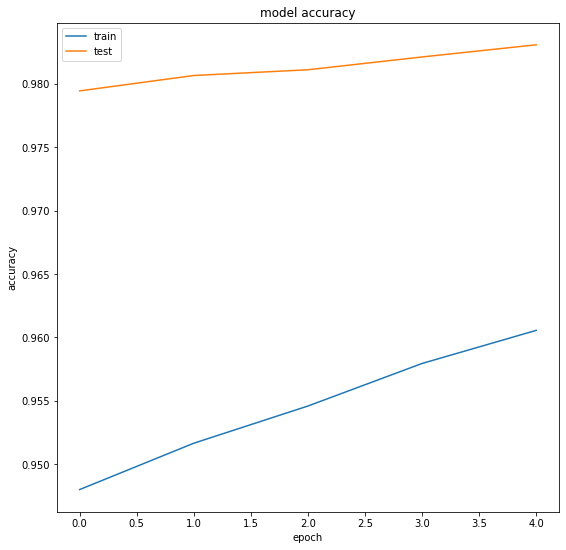

In [35]:
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5, batch_size=10, verbose=1)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 activation_14 (Activation)  (None, 24, 24, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 16)        6416      
                                                                 
 activation_15 (Activation)  (None, 20, 20, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 576)               0         
                                                      